Zachary Aryan
OPIM 3511 Sec 701

*   Problem: Predict used car value based on a number of features and models.
*   Why: Can be useful for buying, selling, and trade-in websites or dealers.

# **Project Setup**

In [34]:
import pandas as pd   # for data wrangling
import seaborn as sns # for plotting
from pylab import *   # plotting
import numpy as np    # numeric python functions
import matplotlib.pyplot as plt # for plotting

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler # puts all data between 0/1
from sklearn.model_selection import train_test_split # splits data into test/train partitions

# import other functions we'll need for regression modeling
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import LogisticRegression # import logistic regression
from sklearn.linear_model import LinearRegression # import logistic regression
from sklearn.neighbors import KNeighborsRegressor # import


# regression error metrics
from sklearn.metrics import mean_absolute_error # on average, how off was my prediction? (in units of original problem); MAE closer to 0 is best!
from sklearn.metrics import mean_squared_error # penalizes the outliers, MSE closer to 0 is best!
from sklearn.metrics import r2_score # r2 closer to 1 is a perfect, 0 is no fit

# for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/USA_cars_datasets.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# checking dimensionality
df.shape

(2499, 13)

In [56]:
# checking for null values and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   int64  
 2   model         2499 non-null   int64  
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   int64  
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   int64  
 7   state         2499 non-null   int64  
 8   country       2499 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 175.8 KB


In [37]:
df.isnull().sum() # no null values
df = df.drop(['Unnamed: 0', 'vin', 'lot', 'condition'], axis=1) # dropped columns with no use towards data
df.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2499.0,18767.671469,12116.094936,0.0,10200.0,16900.0,25555.5,84900.0
year,2499.0,2016.714286,3.442656,1973.0,2016.0,2018.0,2019.0,2020.0
mileage,2499.0,52298.685474,59705.516356,0.0,21466.5,35365.0,63472.5,1017936.0


In [39]:
# As seen above, the minimum price of a car is 0, this cannot be true. We will replace with median values.
median_prices = df['price'].median()
df['price'].replace(25, median_prices, inplace=True)

# **EDA**

Exploratory Data Analysis: Finding patterns in data to make connections before training and predicting

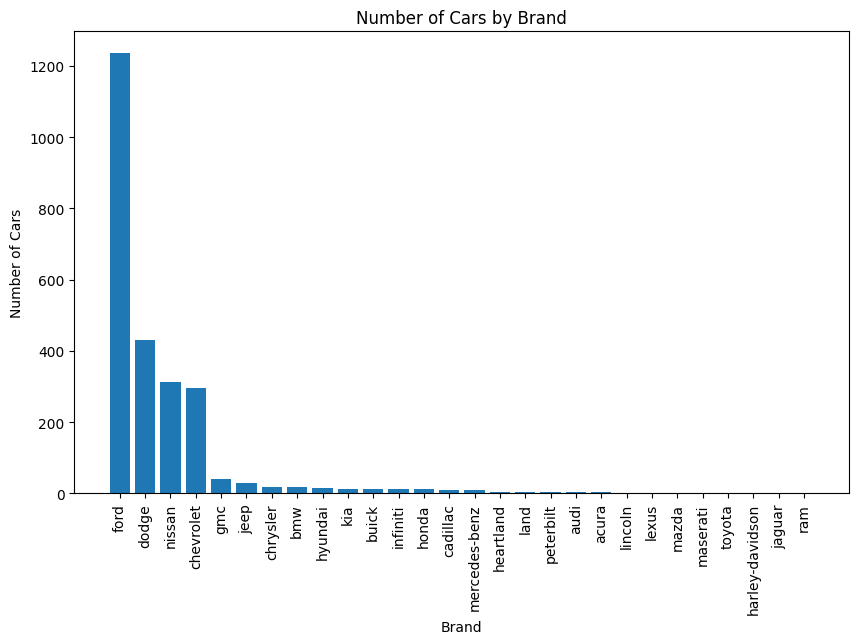

In [40]:
car_count = df['brand'].value_counts()
plt.figure(figsize=(10,6 ))
plt.bar(car_count.index, car_count.values)

plt.title('Number of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)

plt.show()

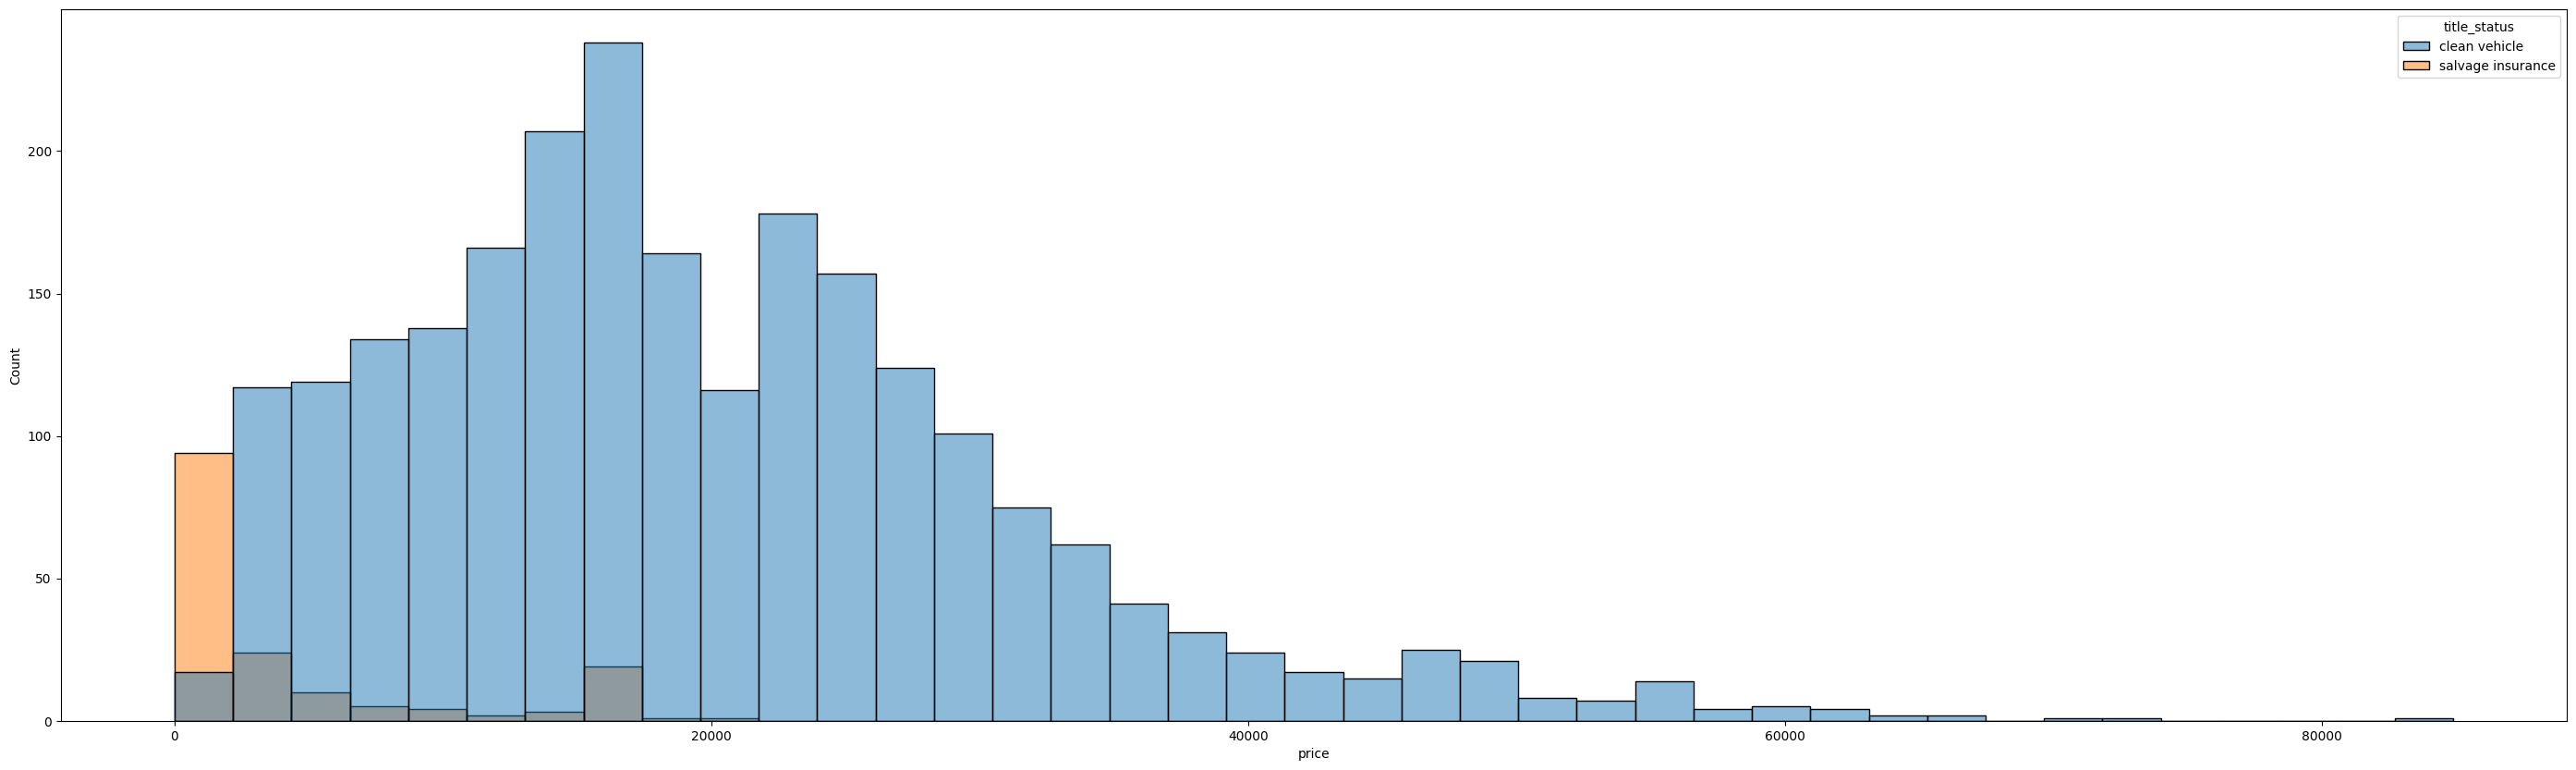

In [41]:
sns.histplot(data=df, x='price', hue='title_status')
plt.show()

<Axes: xlabel='brand', ylabel='price'>

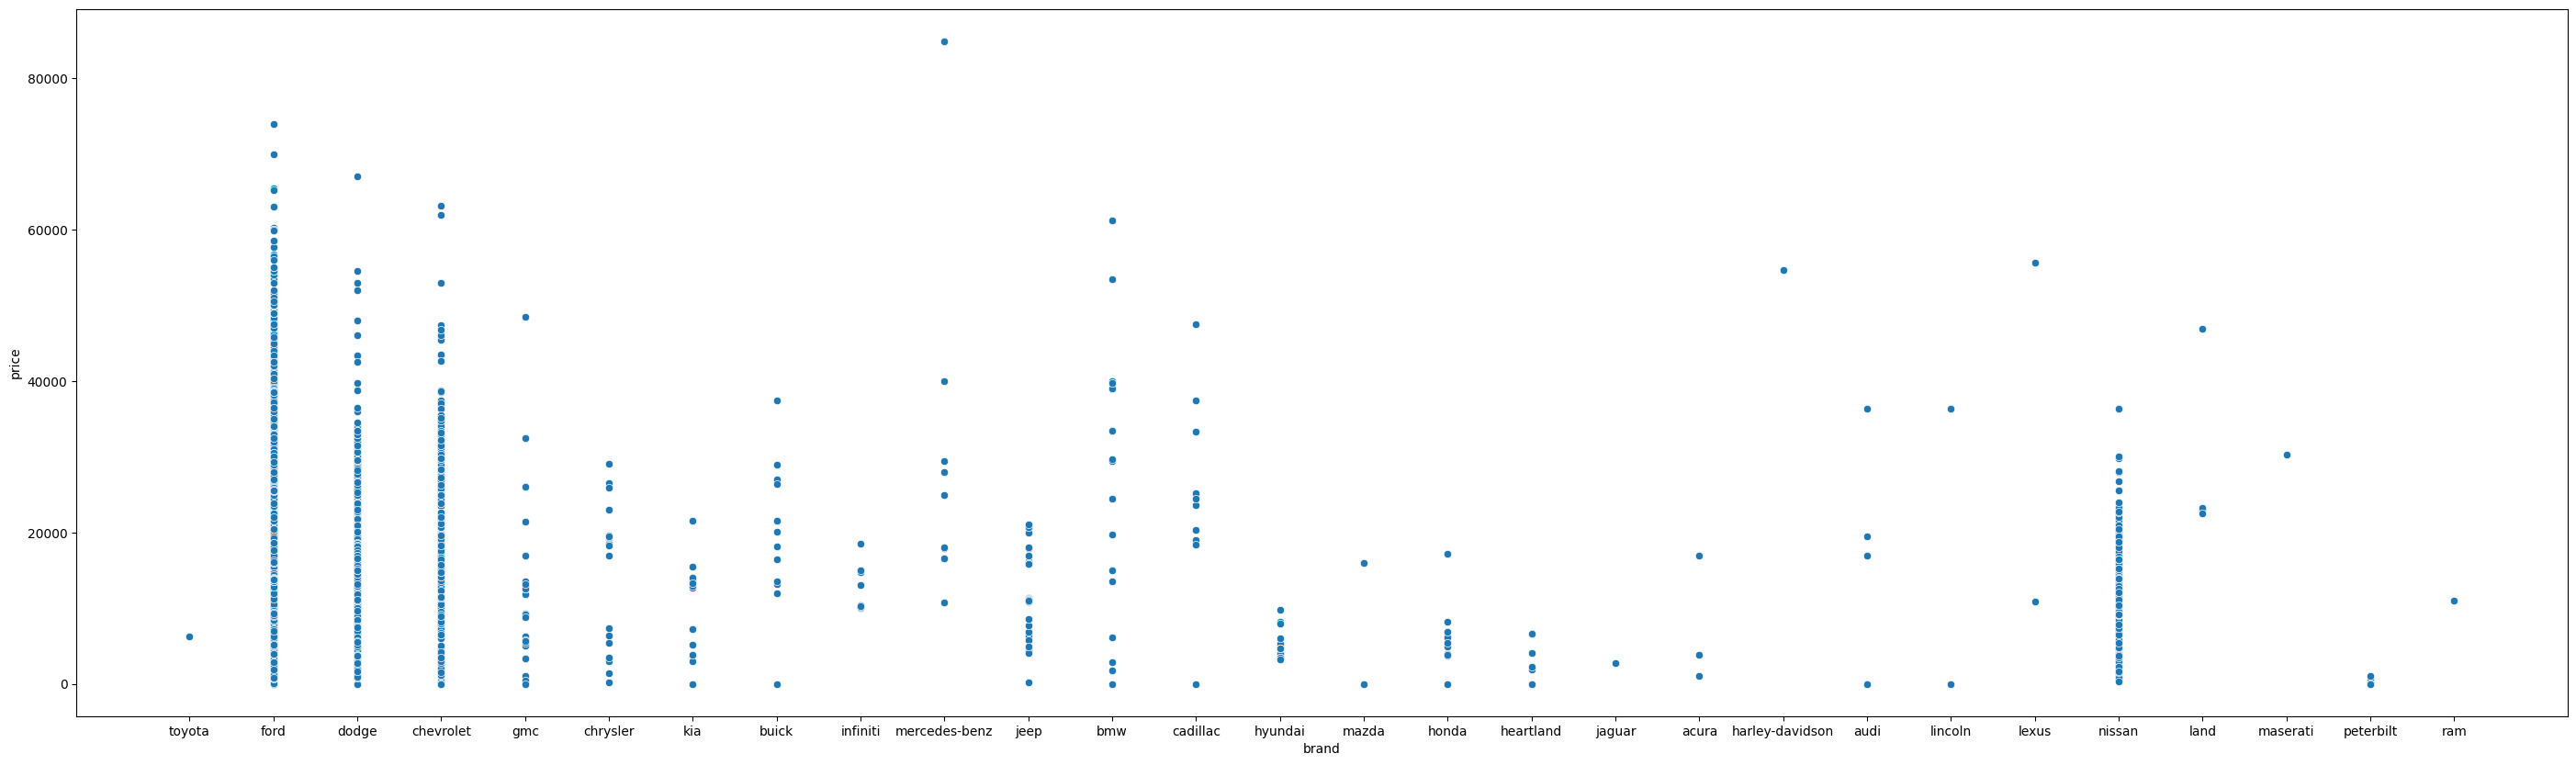

In [42]:
# Plot to show the distribution of used car prices per bran
plt.rcParams['figure.figsize']=(35,10)
sns.scatterplot(x='brand', y='price', data=df)

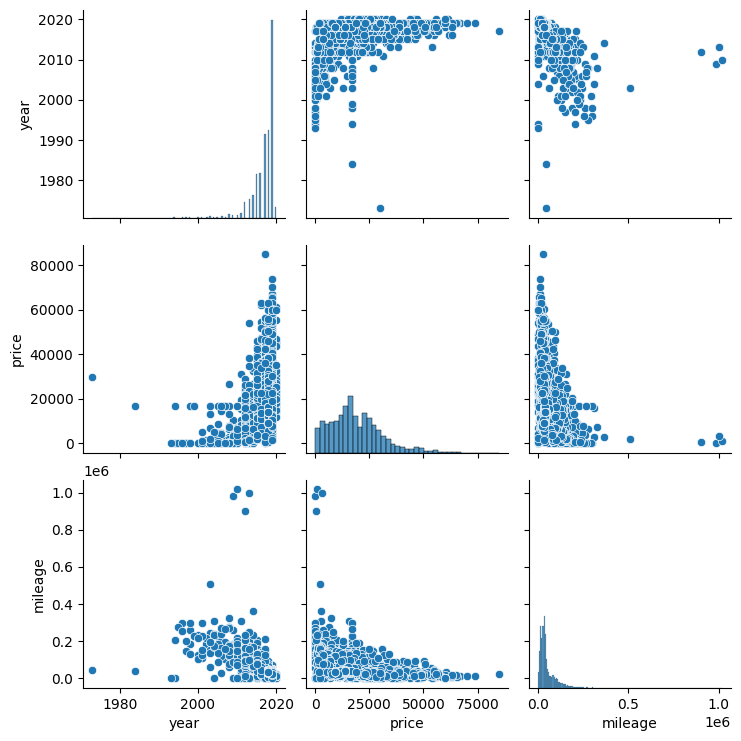

In [43]:
pair_columns = ['year', 'price', 'mileage']
sns.pairplot(df[pair_columns])

# **Training, Testing, and Predicting Data**

Improving Features/Categorical Columns

In [44]:
from sklearn.preprocessing import LabelEncoder

# Encoding the categorical variables to be measurable
df_categorical = df
le = LabelEncoder()
categorical_features = ['brand', 'model', 'title_status', 'color', 'state', 'country']
df_categorical[categorical_features] = df[categorical_features].apply(le.fit_transform)

In [45]:
Y = df['price']               # setting target variable
X = df.drop('price', axis=1)  # removing target from df

# training data, use 80/20
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

# Scale Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# make a variable to store the general model
LR = LinearRegression()
# fit the model
LR = LR.fit(X_train, y_train)
train_preds = LR.predict(X_train)
test_preds = LR.predict(X_test)

In [47]:
print(r2_score(y_train, train_preds))
mse = mean_squared_error(y_test, test_preds)

0.2593070749463333


Random Forest Tree

In [48]:
from sklearn.ensemble import RandomForestRegressor

Y_RFR = df['price']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, Y_RFR,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

X_train_r = np.array(X_train_r)
X_test_r = np.array(X_test_r)
y_train_r = np.array(y_train_r)
y_test_r = np.array(y_test_r)

scaler = MinMaxScaler()
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

In [49]:
pca = PCA(0.95)

# Fit and transform the scaled training data
X_train_r_pca = pca.fit_transform(X_train_r)

# Transform the scaled test data
X_test_r_pca = pca.transform(X_test_r)

rf_model_pca = RandomForestRegressor()
rf_model_pca.fit(X_train_r_pca, y_train_r)
y_pred_pca = rf_model_pca.predict(X_test_r_pca)

mse_RTR_pca = mean_squared_error(y_test_r, y_pred_pca)
pca.explained_variance_ratio_

array([0.34586312, 0.23328832, 0.17284506, 0.13952271, 0.08509873])

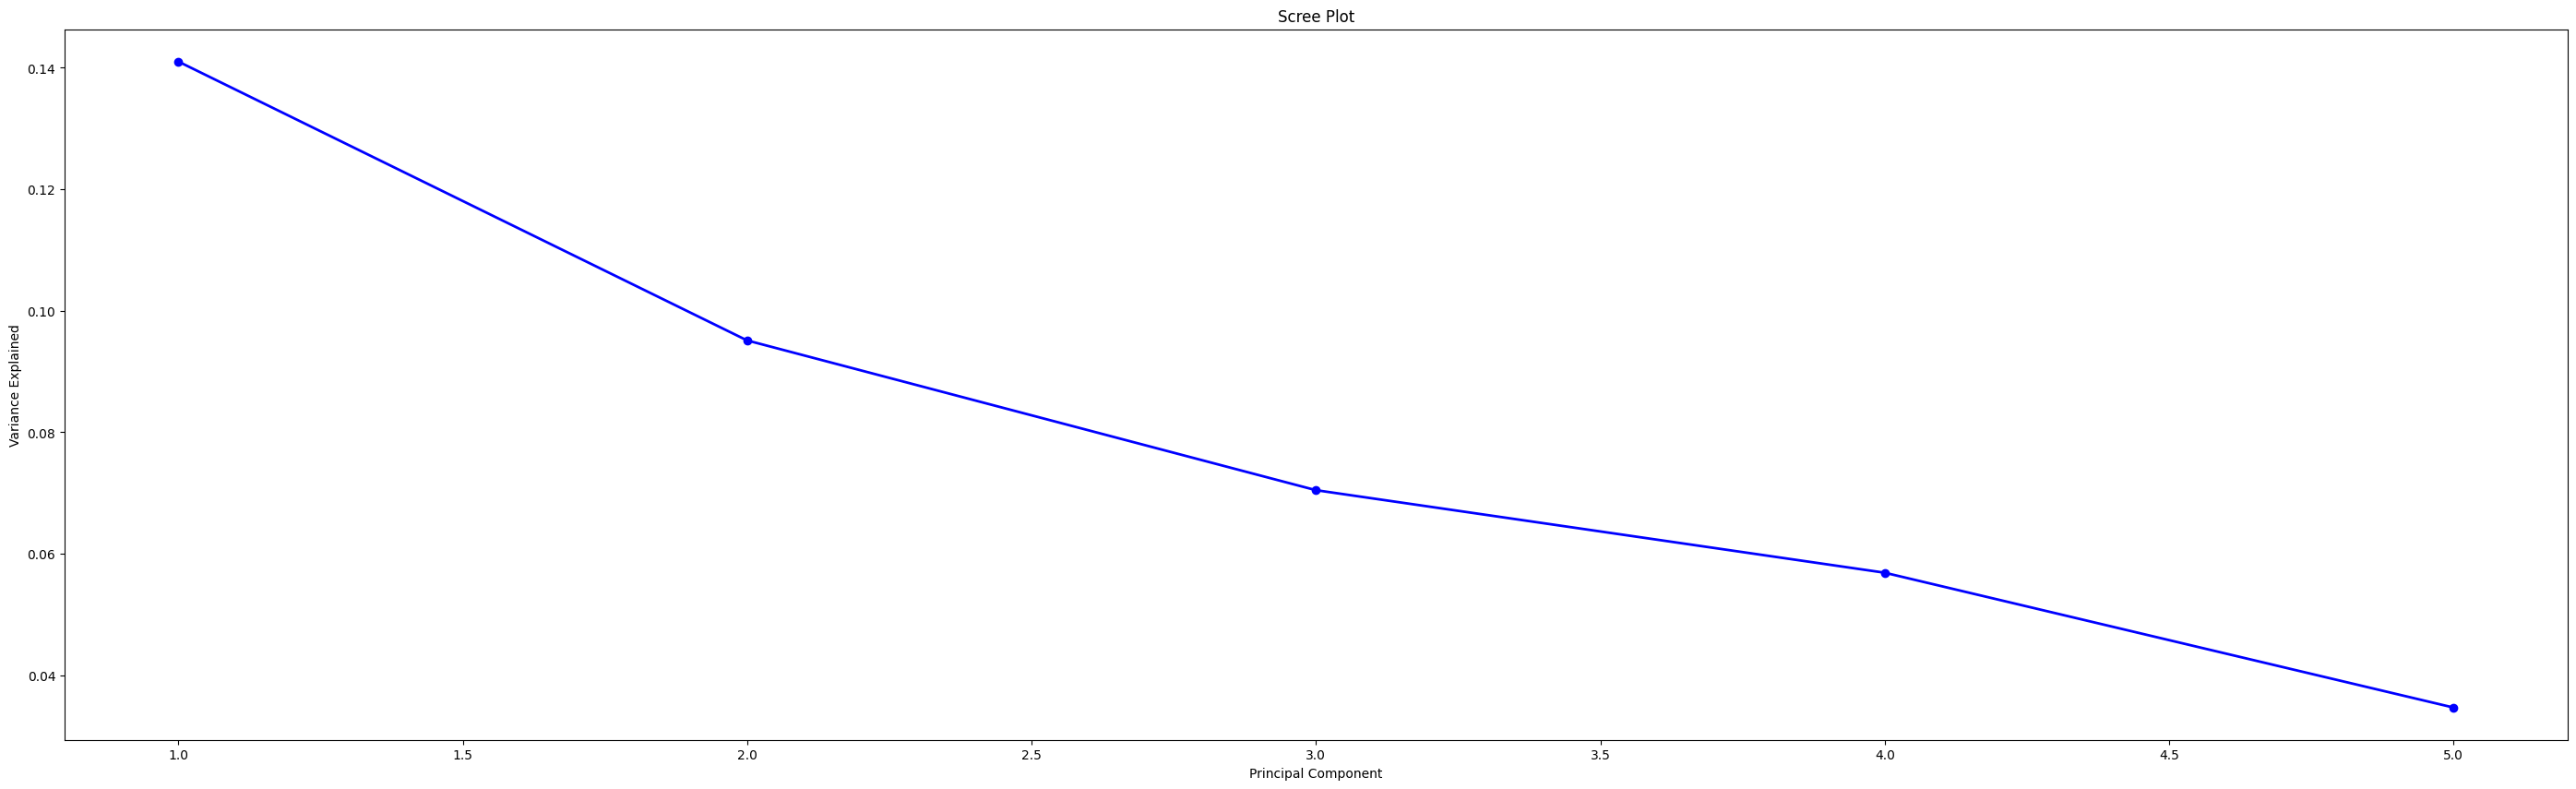

In [50]:
PC_values = np.arange(pca.n_components_) + 1
PC_values
plot(PC_values, pca.explained_variance_, 'o-', linewidth=2, color='blue')
title('Scree Plot')
xlabel('Principal Component')
ylabel('Variance Explained')
show()

In [51]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse_RTR = mean_squared_error(X_test, X_test_r)

In [52]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
DTR = DTR.fit(X_train,y_train)

train_preds_DTR = DTR.predict(X_train)
test_preds_DTR = DTR.predict(X_test)

r2_score(y_test, test_preds_DTR)
mse_DTR = mean_squared_error(y_test, test_preds_DTR)

Retry on Random Forest Regression

In [53]:
Y_RFR2 = df['price']
PCA_new_features = ['brand', 'year', 'mileage']
X_2 = df[PCA_new_features]

X_train_r2, X_test_r2, y_train_r2, y_test_r2 = train_test_split(X_2, Y_RFR2,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 20)

X_train_r2 = np.array(X_train_r2)
X_test_r2 = np.array(X_test_r2)
y_train_r2 = np.array(y_train_r2)
y_test_r2= np.array(y_test_r2)

scaler = MinMaxScaler()
X_train_r2 = scaler.fit_transform(X_train_r2)
X_test_r2 = scaler.transform(X_test_r2)

rf_model2 = RandomForestRegressor()
rf_model2.fit(X_train_r2, y_train_r2)
y_pred2 = rf_model2.predict(X_test_r2)

mse_RTR2 = mean_squared_error(y_test_r2, y_pred2)

In [54]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred3)

In [55]:
print('This is the r2 score for the Linear Regression Model: ' + str(r2_score(y_train, train_preds)))
print('This is the MSE for the Linear Regression Model: ' + str(mse) +  '\n')

print('This is the r2 score for the Random Forest Regression Model: ' + str(r2_score(y_test, y_pred)))
print('This is the MSE for the Random Forest Regression Model: ' + str(mse_RTR) +  '\n')

print('This is the r2 score for the Decision Tree Regression Model: ' + str(r2_score(y_test, test_preds_DTR)))
print('This is the MSE for the Decision Tree Regression Model: ' +  str(mse_DTR) +  '\n' + '\n')

print('This is the r2 score for the Random Forest Regression Retry Model: ' + str(r2_score(y_test_r2, y_pred2)))
print('This is the MSE for the Random Forest Regression Model: ' + str(mse_RTR2) +  '\n')

print('This is the r2 score for the K-Nearest Neighbors Regression Model: ' + str(r2_score(y_test, y_pred3)))
print('This is the MSE for the K-Nearest Neighbors Regression Model: ' + str(mse_knn) +  '\n')

This is the r2 score for the Linear Regression Model: 0.2593070749463333
This is the MSE for the Linear Regression Model: 111282356.13599676

This is the r2 score for the Random Forest Regression Model: 0.6715296612574477
This is the MSE for the Random Forest Regression Model: 0.0

This is the r2 score for the Decision Tree Regression Model: 0.330581995901184
This is the MSE for the Decision Tree Regression Model: 106098086.282


This is the r2 score for the Random Forest Regression Retry Model: 0.23443962460841483
This is the MSE for the Random Forest Regression Model: 106331432.58185978

This is the r2 score for the K-Nearest Neighbors Regression Model: 0.4293810686421875
This is the MSE for the K-Nearest Neighbors Regression Model: 90439122.10704



Overall, the evaluation of r2 scores show that the Random Forest Regression model was the most accurate model with a r2 score of 0.6708. This shows that the model is somewhat accurate, and that the model explains 67.08% of the variability of the price. The linear regression and decision tree model both performed poorly, with very low r2 scores, which shows that they are not accurate models of the data.

This model has lots of data and has many different data types (categorical and quantitative data), which may play a role into the accuracy of the models, as well as a very non diverse PCA, with the five components making about 88.66% of the variance of the dataset. This leaves 11% of the variance left out of the data, which is a good dimensionality reduction.